<h2><center> Welcome to the Landslide Prediction Challenge</h2></center>

A landslide is the movement of a mass of rock, debris, or earth(soil) down a slope. As a common natural hazard, it can lead to significant losses of human lives and properties.


Hong Kong, one of the hilly and densely populated cities in the world, is frequently affected by extreme rainstorms, making it highly susceptible to rain-induced natural terrain landslides

<img src = "https://drive.google.com/uc?export=view&id=1-8sSI75AG3HM89nDJEwo6_KJbAEUXS-r">

The common practice of identifying landslides is visual interpretation which, however, is labor-intensive and time-consuming.

***Thus, this project focus on automating the landslide identification process using artificial intelligence techniques***

This will be achieved by using high-resolution terrain information to perform the terrain-based landslide identification. Other auxiliary data such as the lithology of the surface materials and rainfall intensification factor are also provided.


# **SETUP**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Libraries**

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **UTILS**

In [16]:
def target_distribution(df,
                        targetCol,
                        uniqueTargets,
                        title,
                        labels):

  Count = df[targetCol].tolist()
  plt.figure(figsize=(6,6))
  plt.pie([Count.count(x)*100/len(Count) for x in uniqueTargets],
          labels = labels,autopct='%1.1f%%')
  plt.title(title)

  # Saving figure by changing parameter values
  plt.savefig(f"{targetCol}_dist.jpg", facecolor='w', bbox_inches="tight",
              pad_inches=0.3, transparent=True)
  plt.show()

In [17]:
def plot_numeric_distribution(col= "elevation"):
  df = EDA[[col, 'Label']]

  plt.figure(figsize=(15, 5))
  ax = sns.boxplot(data=df, x='Label', y=col)

  plt.xlabel('Target')
  plt.ylabel(col)
  plt.title(f'{col.upper()} Distribution')
  plt.xticks([0, 1], ['Normal', 'Landslide'])
  plt.grid(True)

  # Saving the figure.
  plt.savefig(f"{col}_dist.jpg")

  # Saving figure by changing parameter values
  plt.savefig(f"{col}_dist.jpg", facecolor='w', bbox_inches="tight",
              pad_inches=0.3, transparent=True)
  plt.show()

# **Load Data files**

In [3]:
csv_path = '/content/drive/MyDrive/Landslide-Prevention-and-Innovation-Project/data/raw/'

In [18]:
# Read files to pandas dataframes
train = pd.read_csv(f'{csv_path}Train.csv')
test = pd.read_csv(f'{csv_path}Test.csv')
sample_submission = pd.read_csv(f'{csv_path}SampleSubmission.csv')

In [19]:
train.head()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,...,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
0,1,130,129,127,126,123,126,125,124,122,...,1.281779,1.281743,1.281720,1.281684,1.281811,1.281788,1.281752,1.281729,1.281693,0
1,2,161,158,155,153,151,162,159,155,153,...,1.359639,1.359608,1.359587,1.359556,1.359683,1.359662,1.359631,1.359610,1.359579,1
2,3,149,151,154,156,158,154,157,158,160,...,1.365005,1.365025,1.365055,1.365075,1.364937,1.364967,1.364988,1.365018,1.365038,0
3,4,80,78,77,75,73,80,78,77,75,...,1.100708,1.100738,1.100759,1.100789,1.100630,1.100650,1.100680,1.100700,1.100731,0
4,5,117,115,114,112,110,115,113,111,110,...,1.284180,1.284130,1.284056,1.284006,1.284125,1.284050,1.284001,1.283926,1.283876,0


In [20]:
EDA = pd.DataFrame()
EDA['Label'] = train['Label']
EDA["geology_nunique"] = train[[x for x in train.columns if "geology" in x]].nunique(axis = 1)

for col in ['elevation', 'lsfactor', 'placurv', 'procurv', 'sdoif', 'slope', 'twi', 'aspect']:
  EDA[col] = train[[x for x in train.columns if col in x] ].mean(1)

In [21]:
EDA.head()

,Label,geology_nunique,elevation,lsfactor,placurv,procurv,sdoif,slope,twi,aspect
0,0,1,119.44,9.013694,0.012659,-0.008915,1.281733,36.830369,3.466513,116.864561
1,1,1,156.20,8.013825,0.010663,-0.003822,1.359578,28.524667,4.660537,184.633436
2,0,1,162.56,10.958018,0.028086,0.022452,1.365054,38.336258,4.227799,284.942436
3,0,1,76.40,3.785720,0.029064,0.008895,1.100818,19.271319,3.737841,173.076448
4,0,2,109.16,7.742521,-0.004572,-0.007679,1.284221,28.257938,4.542060,125.512572


**Target Variable**|

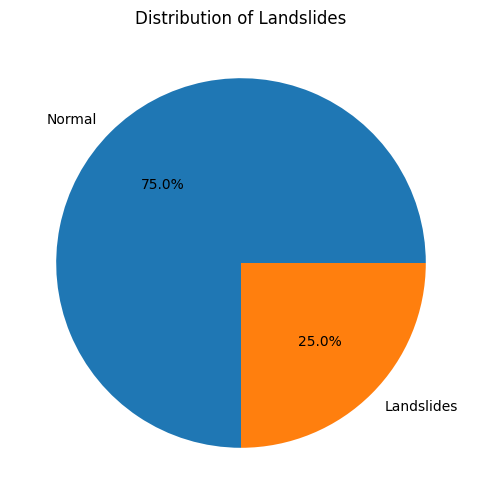

In [22]:
target_distribution(df = EDA,
                    targetCol = 'Label',
                    uniqueTargets = [0, 1],
                    title = "Distribution of Landslides",
                    labels = ['Normal', 'Landslides'])

The plot shows the proportion of landslides in the train dataset. The data shows that 75% of or the recorded values are normal and 25% of the recorded values are landslides.

**ELEVATION**

In [33]:
EDA.groupby('Label')["elevation"].agg({"mean","std","min","max"})

,max,std,mean,min
Label,,,,
0,911.36,166.842511,218.21215,2.96
1,823.28,127.116711,244.70028,11.88


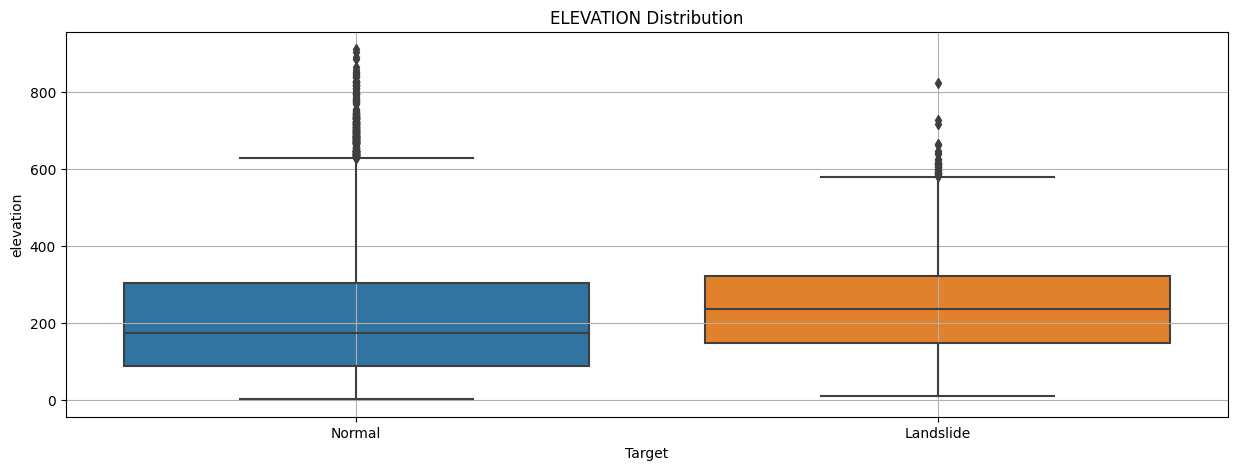

In [12]:
plot_numeric_distribution(col= "elevation")

**Observation**:

**LSFACTOR**

In [34]:
EDA.groupby('Label')["lsfactor"].agg({"mean","std","min","max"})

,max,std,mean,min
Label,,,,
0,24.131212,2.918294,7.314599,0.001403
1,20.570294,2.311512,8.831332,2.531772


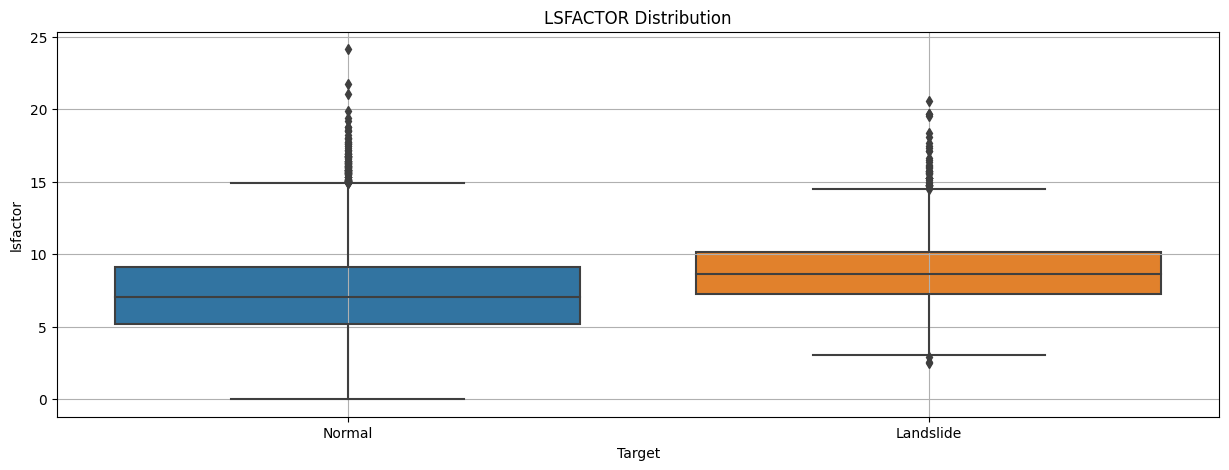

In [35]:
plot_numeric_distribution(col= "lsfactor")

**Observation**:

**SLOPE**

In [36]:
EDA.groupby('Label')["slope"].agg({"mean","std","min","max"})

,max,std,mean,min
Label,,,,
0,60.894232,7.467373,26.753600,6.547674
1,59.947367,5.802215,32.755337,13.707837


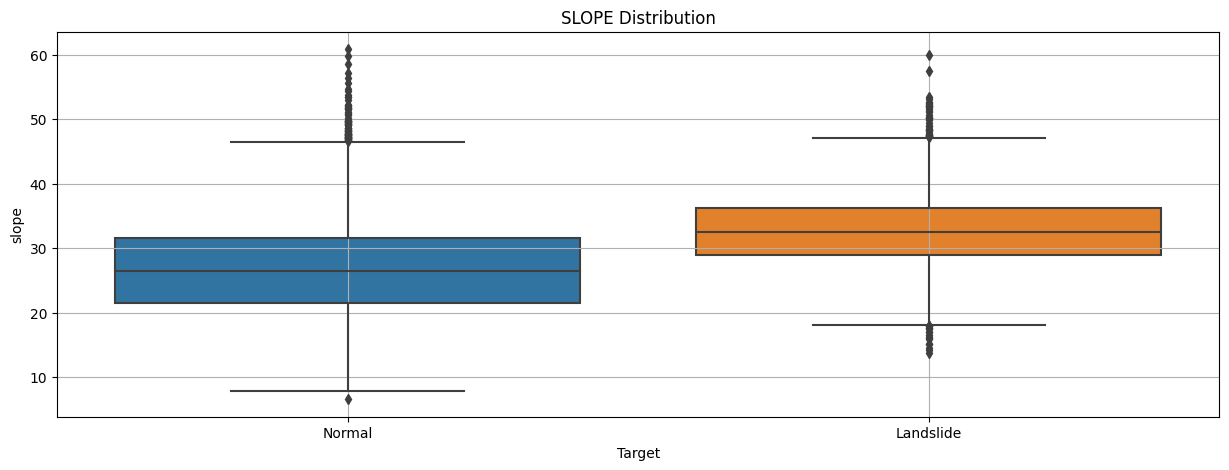

In [14]:
plot_numeric_distribution(col= "slope")

**Observation**:

**TWI**

In [37]:
EDA.groupby('Label')["twi"].agg({"mean","std","min","max"})

,max,std,mean,min
Label,,,,
0,11.979647,1.029590,4.679160,2.299132
1,7.126977,0.721103,4.122911,2.397508


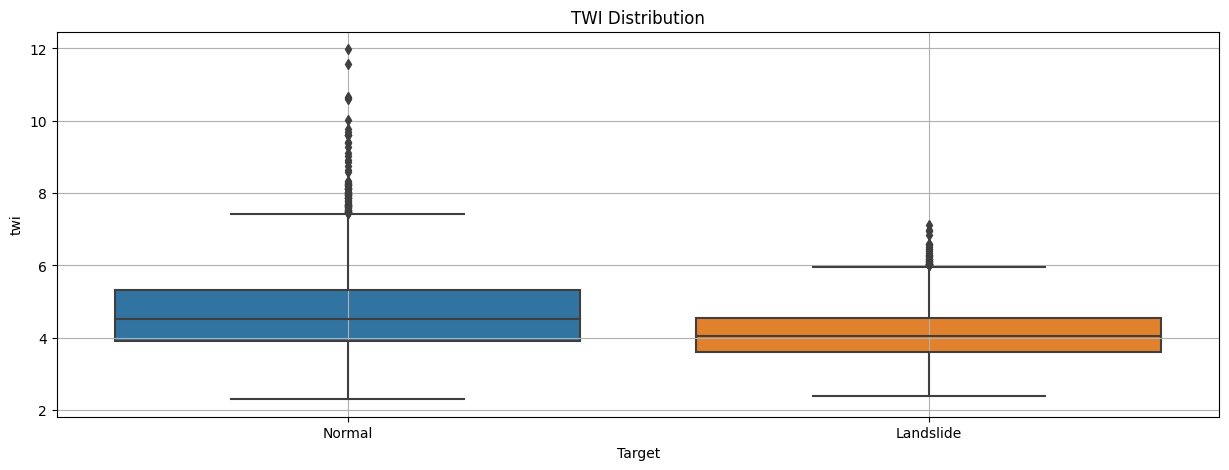

In [15]:
plot_numeric_distribution(col= "twi")

**Observation**: